In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [3]:
#Get Data
#pip 
#pip_he_nu_df = pd.read_csv('../plot_data/HERMES/pip_he_nu.dat', sep ='\s+')
#pip_ne_nu_df = pd.read_csv('../plot_data/HERMES/pip_ne_nu.dat', sep ='\s+')
#pip_kr_nu_df = pd.read_csv('../plot_data/HERMES/pip_kr_nu.dat', sep ='\s+')
#pip_xe_nu_df = pd.read_csv('../plot_data/HERMES/pip_xe_nu.dat', sep ='\s+
#pip_he_q2_df = pd.read_csv('../plot_data/HERMES/pip_he_q2.dat', sep ='\s+')
#pip_ne_q2_df = pd.read_csv('../plot_data/HERMES/pip_ne_q2.dat', sep ='\s+')
#pip_kr_q2_df = pd.read_csv('../plot_data/HERMES/pip_kr_q2.dat', sep ='\s+')
#pip_xe_q2_df = pd.read_csv('../plot_data/HERMES/pip_xe_q2.dat', sep ='\s+')

#pip_he_pt2_df = pd.read_csv('../plot_data/HERMES/pip_he_pt2.dat', sep ='\s+')
pip_ne_pt2 = pd.read_csv('../plot_data/HERMES/pip_ne_pt1.dat', sep ='\s+' ).to_numpy()
pip_kr_pt2 = pd.read_csv('../plot_data/HERMES/pip_kr_pt1.dat', sep ='\s+').to_numpy()
pip_xe_pt2 = pd.read_csv('../plot_data/HERMES/pip_xe_pt1.dat', sep ='\s+').to_numpy()
print (pip_ne_pt2)

#pim_he_pt2_df = pd.read_csv('../plot_data/HERMES/pim_he_pt2.dat', sep ='\s+')
pim_ne_pt2 = pd.read_csv('../plot_data/HERMES/pim_ne_pt1.dat', sep ='\s+').to_numpy()
pim_kr_pt2 = pd.read_csv('../plot_data/HERMES/pim_kr_pt1.dat', sep ='\s+').to_numpy()
pim_xe_pt2 = pd.read_csv('../plot_data/HERMES/pim_xe_pt1.dat', sep ='\s+').to_numpy()


#pi0

#pi0_he_pt2_df = pd.read_csv('../plot_data/HERMES/pi0_he_pt2.dat', sep ='\s+')
pi0_ne_pt2 = pd.read_csv('../plot_data/HERMES/pi0_ne_pt1.dat', sep ='\s+').to_numpy()
pi0_kr_pt2 = pd.read_csv('../plot_data/HERMES/pi0_kr_pt1.dat', sep ='\s+').to_numpy()
pi0_xe_pt2 = pd.read_csv('../plot_data/HERMES/pi0_xe_pt1.dat', sep ='\s+').to_numpy()


#pip_ne_nu_df.head(10)

[[3.90000000e-01 2.57000000e+00 2.30000000e-02 8.74000000e-01
  4.00000000e-03 2.50000000e-02 7.09614185e-05 6.58716807e-05
  1.04519690e+00 3.11639596e-01]
 [4.00000000e-01 2.64000000e+00 7.30000000e-02 8.94000000e-01
  5.00000000e-03 2.50000000e-02 5.18767707e-05 4.82579936e-05
  1.04079535e+00 7.39682534e-05]
 [4.00000000e-01 2.62000000e+00 1.82000000e-01 8.94000000e-01
  4.00000000e-03 2.90000000e-02 3.36933920e-05 3.11615909e-05
  1.02990981e+00 1.86573352e-02]]


[0.93487967 0.94551573 0.94551573]


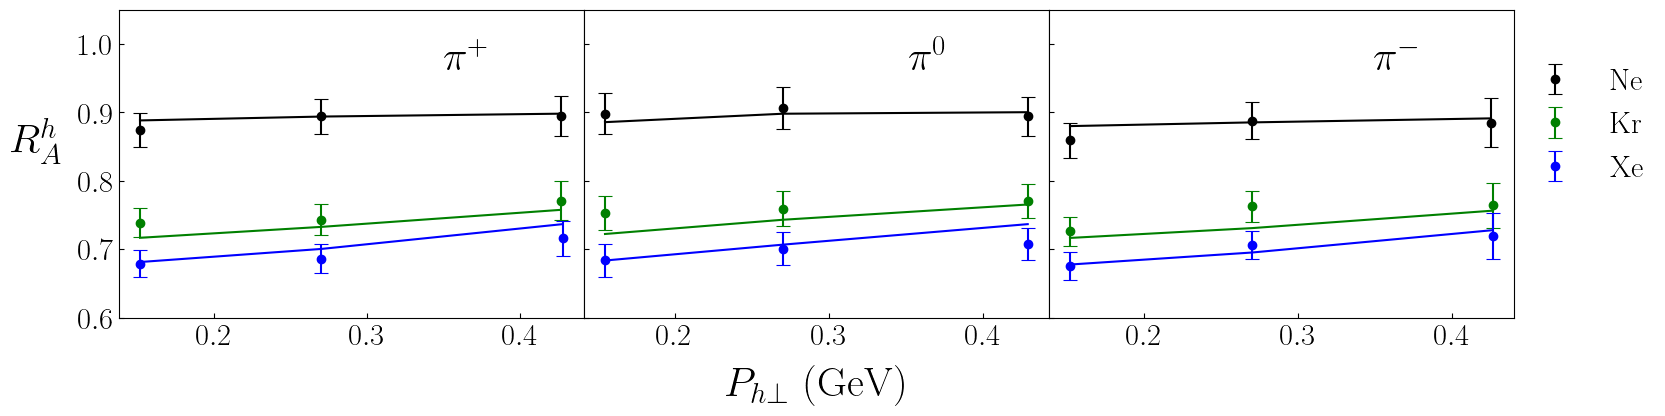

In [4]:
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

#### All share the same axis (plot)
######## Set Size of Font
SizeOfFont = 22

### Set Figure Size
fig.set_size_inches(18,4)

axs[0].errorbar(np.sqrt(pip_ne_pt2[:,2]),pip_ne_pt2[:,3], np.sqrt(pip_ne_pt2[:,4]**2+pip_ne_pt2[:,5]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
axs[0].errorbar(np.sqrt(pip_kr_pt2[:,2]),pip_kr_pt2[:,3], np.sqrt(pip_kr_pt2[:,4]**2+pip_kr_pt2[:,5]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
axs[0].errorbar(np.sqrt(pip_xe_pt2[:,2]),pip_xe_pt2[:,3], np.sqrt(pip_xe_pt2[:,4]**2+pip_xe_pt2[:,5]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
print (np.sqrt(pip_ne_pt2[:,3]))

axs[1].errorbar(np.sqrt(pi0_ne_pt2[:,2]),pi0_ne_pt2[:,3], np.sqrt(pi0_ne_pt2[:,4]**2+pi0_ne_pt2[:,5]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
axs[1].errorbar(np.sqrt(pi0_kr_pt2[:,2]),pi0_kr_pt2[:,3], np.sqrt(pi0_kr_pt2[:,4]**2+pi0_kr_pt2[:,5]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
axs[1].errorbar(np.sqrt(pi0_xe_pt2[:,2]),pi0_xe_pt2[:,3], np.sqrt(pi0_xe_pt2[:,4]**2+pi0_xe_pt2[:,5]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)


axs[2].errorbar(np.sqrt(pim_ne_pt2[:,2]),pim_ne_pt2[:,3], np.sqrt(pim_ne_pt2[:,4]**2+pim_ne_pt2[:,5]**2), fmt = "o",color = 'black', ecolor = 'black', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False, label = r'\rm Ne')
axs[2].errorbar(np.sqrt(pim_kr_pt2[:,2]),pim_kr_pt2[:,3], np.sqrt(pim_kr_pt2[:,4]**2+pim_kr_pt2[:,5]**2), fmt = "o",color = 'green', ecolor = 'green', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,  label = r'\rm Kr')
axs[2].errorbar(np.sqrt(pim_xe_pt2[:,2]),pim_xe_pt2[:,3], np.sqrt(pim_xe_pt2[:,4]**2+pim_xe_pt2[:,5]**2), fmt = "o",color = 'blue', ecolor = 'blue', uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,  label = r'\rm Xe')


axs[0].plot(np.sqrt(pip_ne_pt2[:,2]),pip_ne_pt2[:,7]/pip_ne_pt2[:,6]/pip_ne_pt2[:,8], color = 'black')
axs[0].plot(np.sqrt(pip_kr_pt2[:,2]),pip_kr_pt2[:,7]/pip_kr_pt2[:,6]/pip_kr_pt2[:,8], color = 'green')
axs[0].plot(np.sqrt(pip_xe_pt2[:,2]),pip_xe_pt2[:,7]/pip_xe_pt2[:,6]/pip_xe_pt2[:,8], color = 'blue')

axs[1].plot(np.sqrt(pi0_ne_pt2[:,2]),pi0_ne_pt2[:,7]/pi0_ne_pt2[:,6]/pi0_ne_pt2[:,8], color = 'black')
axs[1].plot(np.sqrt(pi0_kr_pt2[:,2]),pi0_kr_pt2[:,7]/pi0_kr_pt2[:,6]/pi0_kr_pt2[:,8], color = 'green')
axs[1].plot(np.sqrt(pi0_xe_pt2[:,2]),pi0_xe_pt2[:,7]/pi0_xe_pt2[:,6]/pi0_xe_pt2[:,8], color = 'blue')

axs[2].plot(np.sqrt(pim_ne_pt2[:,2]),pim_ne_pt2[:,7]/pim_ne_pt2[:,6]/pim_ne_pt2[:,8], color = 'black')
axs[2].plot(np.sqrt(pim_kr_pt2[:,2]),pim_kr_pt2[:,7]/pim_kr_pt2[:,6]/pim_kr_pt2[:,8], color = 'green')
axs[2].plot(np.sqrt(pim_xe_pt2[:,2]),pim_xe_pt2[:,7]/pim_xe_pt2[:,6]/pim_xe_pt2[:,8], color = 'blue')

props = dict(boxstyle='round', facecolor='white', alpha=0)



axs[0].set_ylabel(r"\rm $R^h_A$", fontsize = 30,rotation = 0,labelpad = 30)
axs[1].set_xlabel(r"\rm $P_{h\perp}$ (GeV)", fontsize = 30, labelpad = 10)



axs[0].set_ylim(0.6,1.05)


axs[0].text(0.7, 0.9,  r"\rm $\pi^+$", transform=axs[0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[1].text(0.7, 0.9,  r"\rm $\pi^0$", transform=axs[1].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

axs[2].text(0.7, 0.9,  r"\rm $\pi^-$", transform=axs[2].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)


axs[2].legend(frameon = False,fontsize = SizeOfFont,loc='upper center', bbox_to_anchor=(1.15, 0.9))


for i in range(3):
        axs[i].tick_params(axis = 'both', direction ='in',labelsize = SizeOfFont)
        
        
fig.savefig('SIDIS_LIKEn.pdf', bbox_inches = "tight")